In [55]:
from rtgemlib import RTGEM
from rtgemlib import sample_from_tgem, LogLikelihood, scoreBic, mle_lambdas, LocaleLogLikelihood, get_count_duration_df,\
get_nodes_pcv_from_data, get_node_pcv_from_data, get_node_LogLikelihood, set_pcv_lambda_t, backward_neighbors_gen,\
compute_logLikelihood

In [56]:
import matplotlib.pyplot as plt

In [57]:
import networkx as nx

In [58]:
# first key is the child, second key is ur moma
model_AB = {
    'B':
    {
        'timescales': {'A': [[1, 2]], 'B': [[5, 6]]},
        'lambdas': {
            (0, 0): 0.6,
            (0, 1): 1.6,
            (1, 0): 3,
            (1, 1): 1
        }
    },
    'A': {
        'timescales': {'B': [[2, 3]]},
        'lambdas': {
            (0,): 0.5,
            (1,): 1
        }
    },
    'C': {
        'timescales': {'C': [[2, 3]]},
        'lambdas': {
            (0,): 0.5,
            (1,): 1
        }
    },
    'D': {
        'timescales': {},
        'lambdas': {(): 2}
    }
}

In [59]:
def empty_nodes(nodes):
    return dict(zip(nodes, [{'timescales': {}, 'lambdas': {(): 1}}] * len(nodes)))

In [60]:
gms = RTGEM(model_AB)

In [61]:
sampled_data = sample_from_tgem(gms)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34s/it]


In [62]:
gms_rd = RTGEM(empty_nodes(list(model_AB.keys())))

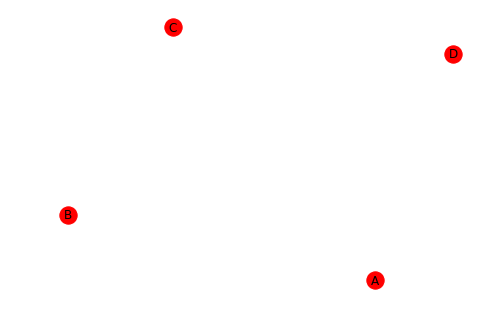

In [63]:
nx.draw(gms_rd.dpd_graph, with_labels=True, arrows=True)
plt.show()

In [64]:
gms_rd.random_walk(max_depth=30)

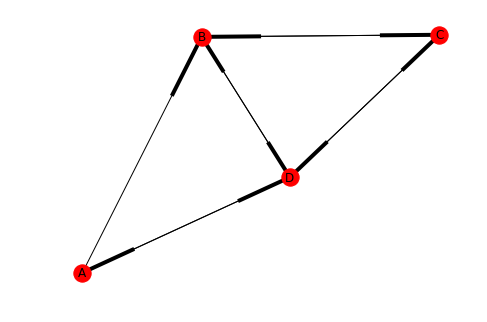

In [65]:
nx.draw(gms_rd.dpd_graph, with_labels=True)
plt.show()

In [66]:
# mle_lambdas(model=gms_rd, data=sampled_data)

In [67]:
scoreBic(model=gms, observed_data=sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


-198.94240569324327

In [68]:
scoreBic(model=gms_rd, observed_data=sampled_data)

-3348.7973870911683

In [69]:
lambdas_count_duration_df = get_count_duration_df(sampled_data)

In [70]:
LogL = compute_logLikelihood(lambdas_count_duration_df)

In [71]:
import numpy as np

In [72]:
log_td = np.log(sampled_data.iloc[-1]['time'] - sampled_data.iloc[0]['time'])

In [73]:
size_log_td = gms_rd.size() * log_td

In [74]:
LogL - size_log_td

-3348.7973870911683

In [75]:
LogL

-770.53939073745801

In [76]:
import pandas as pd

In [78]:
from tqdm import tqdm

In [79]:
model = gms_rd
data = sampled_data

In [81]:
lambdas_count_duration_df

,event,pcv,lambda_t,duration,count
0,B,"(1, 0, 0, 0, 0, 0, 0, 0)",1,29.572394,104
0,A,"(0, 0, 0, 0, 0, 1, 0, 0)",1,27.275545,104
0,D,"(0, 1, 0, 1, 0, 0, 0)",1,29.683617,104
0,C,"(1, 0, 0, 0, 1, 0, 0)",1,28.344175,104
2,B,"(1, 0, 0, 0, 1, 0, 0, 0)",1,29.572394,104
1,A,"(1, 0, 0, 0, 0, 1, 0, 0)",1,27.275545,104
4,B,"(1, 1, 0, 0, 1, 0, 0, 0)",1,29.572394,104
5,C,"(1, 0, 0, 0, 1, 1, 0)",1,28.344175,104
6,C,"(1, 1, 0, 0, 1, 1, 0)",1,28.344175,104
7,C,"(1, 1, 1, 0, 1, 1, 0)",1,28.344175,104


In [52]:
# def backwardSearch(model, data):
set_pcv_lambda_t(model, data)
lambdas_count_duration_df = get_count_duration_df(data)

LogL = compute_logLikelihood(lambdas_count_duration_df)
log_td = np.log(data.iloc[-1]['time'] - data.iloc[0]['time'])

size_log_td = model.size() * log_td

local_maximum = False
best_inverse_op, bop_args, max_cnt_drt_df = None, [], pd.DataFrame([])
maxLogL = -np.inf
maxSize_log_td = np.inf
it = 0
while not local_maximum:
    print('iteration number: {}: scoreBIC = {}'.format(it, LogL - size_log_td))
    max_ngbr_score = -np.inf
    for ngbr_info in tqdm(backward_neighbors_gen(gms_rd, data, lambdas_count_duration_df,\
                                             LogL, size_log_td, log_td)):

        inverse_op, args, LogL_ngbr, size_log_td_ngbr, changed_node_cnt_drt_df = ngbr_info
        score_ngbr = LogL_ngbr - size_log_td_ngbr

        if score_ngbr > max_ngbr_score:
            best_inverse_op = inverse_op
            bop_args = args
            max_cnt_drt_df = changed_node_cnt_drt_df
            max_ngbr_score = score_ngbr
            maxLogL = LogL_ngbr
            maxSize_log_td = size_log_td_ngbr 

    if LogL - size_log_td < max_ngbr_score and max_ngbr_score < 0:
        print('max ngbr {}, args={} '.format(inverse_op, args))
        inverse_op(*args)
        LogL = maxLogL
        size_log_td = maxSize_log_td
        changed_node = max_cnt_drt_df.iloc[0]['event']
        lambdas_count_duration_df = lambdas_count_duration_df[lambdas_count_duration_df['event'] != changed_node]
        lambdas_count_duration_df = pd.concat([lambdas_count_duration_df, max_cnt_drt_df])
    else:
        local_maximum = True
    it += 1
# return model, LogL - size_log_td

iteration number: 0: scoreBIC = -11338.199004757313


19it [00:08,  2.43it/s]


max ngbr <bound method RTGEM.inverse_add_edge_operator of <rtgemlib.rtgem.RTGEM object at 0x0000016D56778780>>, args=[('D', 'D')] 
iteration number: 1: scoreBIC = -8083.375466471333


18it [00:07,  2.60it/s]


max ngbr <bound method RTGEM.inverse_add_edge_operator of <rtgemlib.rtgem.RTGEM object at 0x0000016D56778780>>, args=[('D', 'C')] 
iteration number: 2: scoreBIC = -4828.551928185355


17it [00:07,  1.97it/s]


max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x0000016D56778780>>, args=[('D', 'B'), 0] 
iteration number: 3: scoreBIC = -1573.728389899376


17it [00:06,  2.77it/s]


In [80]:
max_ngbr_score

211.96374963774019

In [ ]:
lambdas_count_duration_df.drop(colu)

In [28]:
changed_node_cnt_drt_df

,event,pcv,lambda_t,duration,count
0,D,"(0,)",2.255352,29.707117,67


In [54]:
lambdas_count_duration_df

,event,pcv,lambda_t,duration,count
0,D,"(0, 0, 0, 0, 0, 0)",1.00000,29.688181,116
0,C,"(0, 0, 0)",1.00000,22.502920,116
2,D,"(0, 0, 0, 1, 0, 0)",1.00000,29.688181,116
0,A,"(1, 0, 0, 0, 0, 0, 0, 1, 0, 0)",1.00000,29.878556,116
7,D,"(1, 0, 0, 1, 0, 0)",1.00000,29.688181,116
11,D,"(1, 0, 0, 0, 0, 0)",1.00000,29.688181,116
1,A,"(1, 1, 0, 0, 0, 0, 0, 1, 0, 0)",1.00000,29.878556,116
2,A,"(0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",1.00000,29.878556,116
24,D,"(1, 1, 0, 0, 0, 0)",1.00000,29.688181,116
4,A,"(1, 0, 1, 0, 1, 0, 0, 1, 1, 0)",1.00000,29.878556,116


In [26]:
max_ngbr_score

594.04134801283863

In [108]:
print('max ngbr {}, args={} '.format(inverse_op, args))

max ngbr <bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x0000027306C5A1D0>>, args=[('D', 'D'), 0] 


In [111]:
inverse_op(*args)

True

In [112]:
gms_rd.dpd_graph.edges[('D', 'D')]

{'timescales': [[0, 20.0]]}

In [116]:
changed_node = max_cnt_drt_df.iloc[0]['event']

In [117]:
lambdas_count_duration_df.loc[lambdas_count_duration_df['event'] == changed_node] = max_cnt_drt_df.drop(columns=['index'])

In [115]:
max_cnt_drt_df[['event', 'pcv', 'lambda_t', 'duration', 'count']]

,event,pcv,lambda_t,duration,count
0,C,"(1, 0, 0, 1, 0, 1, 0, 0)",0.268664,29.777017,8
1,C,"(1, 1, 0, 0, 0, 0, 0, 0)",0.268664,29.777017,8
2,C,"(0, 0, 0, 0, 0, 0, 0, 0)",0.268664,29.777017,8


In [118]:
lambdas_count_duration_df

,event,pcv,lambda_t,duration,count
0,D,"(0, 1, 0, 0)",1.000000,29.193897,121.0
0,A,"(0, 0, 0, 1, 0, 0, 0, 0)",1.000000,28.092663,121.0
0,B,"(0, 0, 0, 0, 1, 0, 0, 0)",1.000000,28.022272,121.0
0,C,"(1, 0, 0, 1, 0, 1, 0, 0)",0.268664,29.777017,8.0
1,B,"(1, 0, 0, 0, 1, 0, 0, 0)",1.000000,28.022272,121.0
2,A,"(1, 0, 0, 1, 0, 0, 1, 0)",1.000000,28.092663,121.0
4,B,"(1, 1, 0, 0, 1, 0, 0, 0)",1.000000,28.022272,121.0
4,A,"(1, 1, 0, 0, 0, 0, 1, 0)",1.000000,28.092663,121.0
5,B,"(1, 1, 0, 0, 0, 0, 0, 0)",1.000000,28.022272,121.0
10,B,"(0, 0, 0, 0, 0, 0, 0, 0)",1.000000,28.022272,121.0


In [ ]:
scoreBic()

In [107]:
max_ngbr_score

104.96810483441936

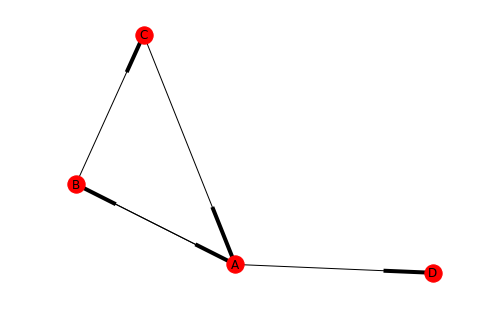

In [51]:
nx.draw(gms_rd.dpd_graph, with_labels=True)
plt.show()

In [54]:
scoreBic(model=gms_rd, observed_data=sampled_data)

KeyError: ((0, 0), 'occurred at index 0')

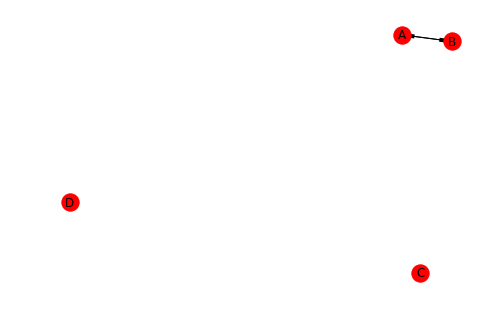

In [52]:
nx.draw(gms.dpd_graph, with_labels=True)
plt.show()

In [50]:
args

('D', 'C')

In [53]:
inverse_op(*[args])

True

In [26]:
%time backwardSearch(model=gms_rd, data=sampled_data)

iteration number: 0: scoreBIC = -6551.270907204265
iteration number: 1: scoreBIC = -4890.72272221899
iteration number: 2: scoreBIC = -3966.277611494101
iteration number: 3: scoreBIC = -3148.080317124101
iteration number: 4: scoreBIC = -2738.981669939101


TypeError: inverse_add_edge_operator() takes 2 positional arguments but 3 were given

In [25]:
ngbrs = list(backward_neighbors_gen(gms_rd,\
                                    sampled_data,\
                            lambdas_count_duration_df,\
                            LogL,\
                            size_log_td,\
                            log_td)
)

In [33]:
ngbrs[1][0](*ngbrs[1][1])

True

In [47]:
def apply_operation(op, *args):
    op(*args)


In [46]:
apply_operation(ngbrs[0][0], args)

TypeError: apply_operation_f() takes 1 positional argument but 2 were given

In [44]:
def apply_operation_f(op, **args):
    op(**args)


In [45]:
args = {'edge': ngbrs[0][1][0], 'tm_idx': 0}

In [32]:
apply_operation(ngbrs[0][0], [ngbrs[0][1][0], 0])

TypeError: inverse_split_operator() missing 1 required positional argument: 'tm_idx'

In [31]:
ngbrs[1]

(<bound method RTGEM.inverse_split_operator of <rtgemlib.rtgem.RTGEM object at 0x000001E16AAF3160>>,
 [('B', 'D'), 2],
 -574.29466207373787,
 28617.462335210108,
     index event                                      pcv  lambda_t   duration  \
 0       0     D  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)  2.091932  29.637674   
 1       1     D  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0)  2.091932  29.637674   
 2       2     D  (1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0)  2.091932  29.637674   
 3       7     D  (1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)  2.091932  29.637674   
 4       8     D  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  2.091932  29.637674   
 5      10     D  (1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  2.091932  29.637674   
 6      15     D  (1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0)  2.091932  29.637674   
 7      20     D  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0)  2.091932  29.637674   
 8      22     D  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)  2.091932  29.637674   
 9      24     D  

In [122]:
gms_rd.inverse_extend_operator(('B', 'A'))

True

In [107]:
data = sampled_data
changed_node = 'A'
model = gms_rd
changed_node_cnt_drt_df = lambdas_count_duration_df
optimize_lambdas = True

In [108]:
changed_node_data = data[data['event'] == changed_node]

changed_node_data.loc[:, 'pcv'] = get_node_pcv_from_data(model,
                                                         data,
                                                         changed_node_data,
                                                         event=changed_node).values

changed_node_cnt_drt_df = get_count_duration_df(
    changed_node_data).reset_index()

if optimize_lambdas:
    changed_node_cnt_drt_df.loc[:, 'lambda_t'] = changed_node_cnt_drt_df[
        'count'] / changed_node_cnt_drt_df['duration']


C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [109]:
sampled_data.set_index('event').loc['A']

,time,pcv,lambda_t
event,,,
A,3.848421,"(1, 0, 0, 1, 0, 1, 0)",0.307807
A,5.207715,"(1, 0, 0, 1, 0, 1, 0)",0.307807
A,9.243312,"(1, 0, 0, 0, 0, 0, 0)",0.307807
A,9.293197,"(1, 0, 0, 0, 0, 0, 0)",0.307807
A,15.838203,"(1, 1, 0, 0, 0, 0, 0)",0.307807
A,17.055679,"(1, 1, 0, 0, 0, 0, 0)",0.307807
A,25.188229,"(0, 0, 0, 0, 0, 0, 0)",0.307807
A,25.990328,"(0, 0, 0, 0, 0, 0, 0)",0.307807


In [111]:
get_count_duration_df(
    sampled_data).set_index('event').loc['A']

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,pcv,lambda_t,duration,count
event,,,,
A,"(1, 0, 0, 1, 0, 1, 0)",0.307807,25.990328,8
A,"(1, 0, 0, 0, 0, 0, 0)",0.307807,25.990328,8
A,"(1, 1, 0, 0, 0, 0, 0)",0.307807,25.990328,8
A,"(0, 0, 0, 0, 0, 0, 0)",0.307807,25.990328,8


In [112]:
changed_node_cnt_drt_df

,index,event,pcv,lambda_t,duration,count
0,0,A,"(1, 0, 0, 1, 0, 1, 0)",0.307807,25.990328,8
1,2,A,"(1, 0, 0, 0, 0, 0, 0)",0.307807,25.990328,8
2,4,A,"(1, 1, 0, 0, 0, 0, 0)",0.307807,25.990328,8
3,6,A,"(0, 0, 0, 0, 0, 0, 0)",0.307807,25.990328,8


In [113]:
L_ngbr = LocaleLogLikelihood(model=gms_rd, data=sampled_data, baseLogL=LogL, nodeLogL=nd_L, changed_node='A',\
                        optimize_lambdas=True)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
LogL

-452.66003806784136

In [114]:
L_ngbr

-452.66003806784136

In [117]:
size_log_td

2587.9044652400021

In [119]:
L_ngbr - (size_log_td - nd_s * log_td + nd_s * log_td)

-3040.5645033078436

In [123]:
gms_rd.initLambdas(node='A')
mle_lambdas(data=sampled_data, model=gms_rd)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,event,pcv,lambda_t,duration,count
0,D,"(1, 0, 0, 0, 0, 0, 0)",2.132316,29.076369,62
0,B,"(1, 0, 0, 0, 0, 0, 0, 0)",1.096580,27.357787,30
0,C,"(1, 0, 0, 0, 0, 0, 0, 0)",0.586267,28.997043,17
3,B,"(1, 1, 0, 0, 0, 0, 0, 0)",1.096580,27.357787,30
10,D,"(1, 0, 1, 0, 0, 0, 0)",2.132316,29.076369,62
0,A,"(1, 0, 0, 1, 0, 0)",0.307807,25.990328,8
2,C,"(1, 0, 0, 1, 0, 0, 0, 0)",0.586267,28.997043,17
4,B,"(1, 1, 1, 0, 0, 0, 0, 0)",1.096580,27.357787,30
4,C,"(1, 1, 0, 1, 0, 0, 0, 0)",0.586267,28.997043,17
2,A,"(1, 0, 0, 0, 0, 0)",0.307807,25.990328,8


In [124]:
LogLikelihood(model=gms_rd, observed_data=sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


-452.66003806784136

In [125]:
scoreBic(model=gms_rd, observed_data=sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


-2824.9057978711767

In [35]:
L_ngbr

-1029.0764010123407

In [47]:
d = sampled_data.iloc[-1]['time'] - sampled_data.iloc[0]['time']

In [85]:
gms_rd.size()

48

In [92]:
gms_rd.get_node_nb_parents_timescales(node='A')

11

In [ ]:
gms_rd()

In [32]:
gms_rd.dpd_graph.edges[('B', 'C')]['timescales']

[[0, 10.0]]

In [30]:
scoreBic(model=gms_rd, observed_data=sampled_data)

C:\Users\MOTALY\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


-460.12119970196727

In [31]:
sampled_data

,time,event,pcv,lambda_t
0,1.343271,A,"(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.511064
0,1.494150,D,"(1, 0)",2.003545
1,2.197167,D,"(1, 0)",2.003545
0,3.290799,C,"(1, 0, 0, 0, 0)",0.529170
2,3.968567,D,"(1, 0)",2.003545
1,4.401238,A,"(1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.511064
3,4.609403,D,"(1, 0)",2.003545
4,4.922160,D,"(1, 0)",2.003545
2,4.952450,A,"(1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.511064
1,5.009317,C,"(1, 0, 0, 0, 0)",0.529170


In [41]:
gms_rd.extend_operator(('B', 'D'))

In [16]:
def backwardSearch(data, init_m):
    log_t = np.log(data.iloc[-1]['time'] - data.iloc[0]['time'])
    
    m = init_m
    set_pcv_lambda_t(m, data)
    lambdas_count_duration_df = get_count_duration_df(data)
    
    score_m = compute_logLikelihood(lambdas_count_duration_df) - m.size() * log_t

    best_ngbr_m = None
    score_best_ngbr = -np.inf
    
    while(score_m > score_best_ngbr):
        for nbgr_m in m.backward_neighbors_gen():
            

SyntaxError: invalid syntax (<ipython-input-16-c4bacb6f3d81>, line 10)